Choose random K points as centroids for K clusters  
Assign datas to closest cluster.  
Compute new centroids and Reassign datas to closest cluster till there are no Reassign

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline
data = pd.read_csv('Mall_Customers.csv')
X = data.iloc[:,[3,4]].values
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
from sklearn.cluster import KMeans
#Within cluster sum of squares = sum(dist(Point_i, centroid)) + ...  for cluster 2 upto n
wcss = []
#Visualize 1 to 10 clusters
for i in range(1,11):
    # n_init = No. of times cluster will run
    model = KMeans(n_clusters=i,init='k-means++', max_iter=200,n_init=10, random_state=0) 
    model.fit(X)
    wcss.append(model.inertia_)

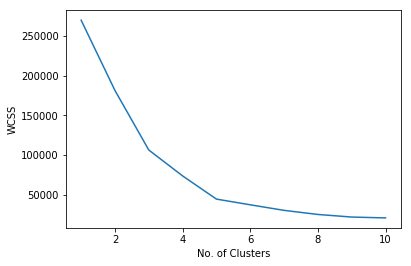

In [3]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()
    

In [4]:
#selecting 5 as 1 to 5 has higher steep
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_pred = model.fit_predict(X)

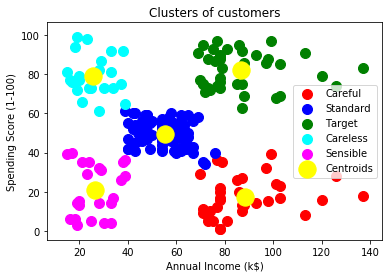

In [5]:


# Visualising the clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Careful') #High income, Low spend
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Standard') #Avg. icome, Avg. spend
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Target') # High income, High spend
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Careless') #Low Income, High spend
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Sensible') #Low Income, Low spend
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()